In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import difflib
from fuzzywuzzy import fuzz ## produces an error code could not install python-Levenshtein
from fuzzywuzzy import process

/home/mitch/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df=pd.DataFrame()
#about to be shamelessly stolen from knoema.com

## Market Share

In [3]:
df['Manufacturers']=pd.Series(['GM','FORD','TOYOTA','FCA','HONDA','NISSAN','HYUNDAI','VOLKSWAGEN','KIA','DAIMLER','BMW','SUBARU','MAZDA','VOLVO','INTERNATIONAL','PACCAR','MITSUBISHI','LAND_ROVER','VOLVO_TRUCK','PORSCHE'])
df['2012']=pd.Series([17.56,15.22,14.13,11.12,9.63,7.72,4.76,3.91,3.77,2.76,2.35,2.28,1.87,0.46,0.46,0.43,0.39,0.30,0.27,0.24])
df

,Manufacturers,2012
0,GM,17.56
1,FORD,15.22
2,TOYOTA,14.13
3,FCA,11.12
4,HONDA,9.63
5,NISSAN,7.72
6,HYUNDAI,4.76
7,VOLKSWAGEN,3.91
8,KIA,3.77
9,DAIMLER,2.76


In [4]:
violations=pd.read_csv('data/df_focus.csv',low_memory=False)

In [5]:
violations.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type', 'Geolocation',
       'datetime'],
      dtype='object')

In [6]:
violations=violations[['Date Of Stop', 'Time Of Stop', 'Latitude', 'Longitude','Year', 'Make', 'Model', 'Color','Race', 'Gender','Geolocation','Charge']]

In [7]:
violations.columns

Index(['Date Of Stop', 'Time Of Stop', 'Latitude', 'Longitude', 'Year', 'Make',
       'Model', 'Color', 'Race', 'Gender', 'Geolocation', 'Charge'],
      dtype='object')

In [8]:
violations.Make.unique()

array(['FORD', 'TOYOTA', 'HONDA', 'DODG', 'HYUNDAI', 'DODGE', 'CADI',
       'CHEVROLET', 'AUDI', 'TOYT', 'SATURN', 'LEXUS', 'ACUR', 'NONE',
       'MERCEDEZ', 'BUICK', 'CHEV', 'KAWASAKI', 'ACURA', 'JEEP',
       'MITSUBISHI', 'LINCOLN', 'HOND', 'CHRY', 'INFI', 'SUBARU', 'GMC',
       'MAZDA', 'BMW', 'NISS', 'PONT', 'TOYOT', 'CHRYSLER', 'OLDS',
       'NISSAN', 'LNDR', 'CHEVY', 'LINC', 'LANDROVER', 'TOY', 'INFINITI',
       'MERCURY', 'SAAB', 'HYUN', 'KIA', 'HUMMER', 'MERCEDES', 'MERC',
       'MERZ', 'SATU', 'SCION', 'BUIC', 'VOLK', 'RANGE ROVER', 'MAZD',
       'MITS', 'SUBA', 'PLYMOUTH', 'CHEVEROLET', 'VOLKSWAGON', 'INFINITY',
       'VOLKS', 'OLDSMOBILE', 'PONTIAC', 'HYUNDIA', 'SCIO', 'VW',
       'JAGUAR', 'CADILLAC', 'SUZI', 'TOYO', 'FREIGHTLINER', 'VOLVO',
       'STRN', 'VOLKSWAGEN', 'MINI', 'CHEVORLET', 'LEXS', 'LEXU', 'VOLV',
       'PORS', 'ISUZU', 'NISSIAN', 'LAND ROVER', 'SUZUKI', 'INTL',
       'CADILAC', 'SUB', 'MACK', 'ISUZ', 'ISU', 'HINO', 'GEO', 'HYUND',
       'CHRYS

In [9]:
fecon=pd.read_csv('data/fecon.csv',low_memory=False)

In [10]:
choices=['Audi','BMW','General Motors', 'GM', 'GMC','Honda','Toyota','MAZDA','Mercedes','Nissan','Porsche','Chrysler','Jaguar','Mitsubishi','Ford','Hyundai','Volkswagen', 'VW','Volvo','Kia','Mitsubishi','Saab','Subaru','Suzuki','Land Rover','Dodge','Chevrolet','Lexus','Cadillac','Saturn','Acura','Jeep','Buick']
len(choices)

33

The below works and is a cool piece of code so I left it in, but it is very slow. Left it running overnight.

In [11]:
#ORDER OF OPERATIONS MATTERS. This code is going though all 1.3million lines of the DataFrame and running
#a new comparison each time. Should have run on the array of Violations.Make.unique()
#and made a conversion dictionary, from old to new. Should be MUCH faster.
#fn = lambda row: process.extractOne(row.Make, choices) # define a function for the new column
#col = violations.apply(fn, axis=1) # get column data with an index
#violations = violations.assign(Mfr=col.values) # assign values to column 'c'

In [12]:
uniqMake=list(violations.Make.unique())
len(uniqMake)

110

In [13]:
mandict={}
for i in uniqMake:
    mandict[i]= process.extractOne(i, choices)
mandict

{'FORD': ('Ford', 100),
 'TOYOTA': ('Toyota', 100),
 'HONDA': ('Honda', 100),
 'DODG': ('Dodge', 89),
 'HYUNDAI': ('Hyundai', 100),
 'DODGE': ('Dodge', 100),
 'CADI': ('Cadillac', 90),
 'CHEVROLET': ('Chevrolet', 100),
 'AUDI': ('Audi', 100),
 'TOYT': ('Toyota', 80),
 'SATURN': ('Saturn', 100),
 'LEXUS': ('Lexus', 100),
 'ACUR': ('Acura', 89),
 'NONE': ('General Motors', 45),
 'MERCEDEZ': ('Mercedes', 88),
 'BUICK': ('Buick', 100),
 'CHEV': ('Chevrolet', 90),
 'KAWASAKI': ('Kia', 72),
 'ACURA': ('Acura', 100),
 'JEEP': ('Jeep', 100),
 'MITSUBISHI': ('Mitsubishi', 100),
 'LINCOLN': ('Chevrolet', 38),
 'HOND': ('Honda', 89),
 'CHRY': ('Chrysler', 90),
 'INFI': ('Mitsubishi', 45),
 'SUBARU': ('Subaru', 100),
 'GMC': ('GMC', 100),
 'MAZDA': ('MAZDA', 100),
 'BMW': ('BMW', 100),
 'NISS': ('Nissan', 90),
 'PONT': ('General Motors', 45),
 'TOYOT': ('Toyota', 91),
 'CHRYSLER': ('Chrysler', 100),
 'OLDS': ('Volkswagen', 68),
 'NISSAN': ('Nissan', 100),
 'LNDR': ('Land Rover', 68),
 'CHEVY': ('C

In [14]:
fn = lambda row: mandict[str(row.Make)]
col = violations.apply(fn, axis=1) # get column data with an index
violations = violations.assign(Mfr=col.values) # assign values to column 'c'


In [15]:
acceptmake=list(mandict.keys())
acceptmake=['FORD',
 'TOYOTA',
 'HONDA',
 'DODG',
 'HYUNDAI',
 'DODGE',
 'CADI',
 'CHEVROLET',
 'AUDI',
 'TOYT',
 'SATURN',
 'LEXUS',
 'ACUR',
 'MERCEDEZ',
 'CHEV',
 'ACURA',
 'JEEP',
 'MITSUBISHI',
 'HOND',
 'CHRY',
 'SUBARU',
 'GMC',
 'MAZDA',
 'BMW',
 'NISS',
 'TOYOT',
 'CHRYSLER',
 'NISSAN',
 'LNDR',
 'CHEVY',
 'LANDROVER',
 'TOY',
 'MERCURY',
 'SAAB',
 'HYUN',
 'KIA',
 'MERCEDES',
 'MERC',
 'MERZ',
 'SATU',
 'VOLK',
 'RANGE ROVER',
 'MAZD',
 'MITS',
 'SUBA',
 'PLYMOUTH',
 'CHEVEROLET',
 'VOLKSWAGON',
 'INFINITY',
 'VOLKS',
 'HYUNDIA',
 'VW',
 'JAGUAR',
 'CADILLAC',
 'SUZI',
 'TOYO',
 'VOLVO',
 'STRN',
 'VOLKSWAGEN',
 'CHEVORLET',
 'LEXS',
 'LEXU',
 'VOLV',
 'PORS',
 'NISSIAN',
 'LAND ROVER',
 'SUZUKI',
 'CADILAC',
 'SUB',
 'HYUND',
 'CHRYSTLER',
 'MERCEDES BENZ',
 'LEX',
 'TOYTA',
 'CHRYS',
 'MITZ',
 'SUZU',
 'PORSCHE',
 'JAGU']

In [16]:
violations=violations[violations.Make.isin(acceptmake)]


In [356]:
len(violations.Make)

1190490

In [357]:
mandict={}
for i in violations.Make.unique():
    mandict[i]= process.extractOne(i, choices)
mandict

{'FORD': ('Ford Motor Company Fiesta FWD', 90),
 'TOYOTA': ('Toyota LFA', 90),
 'HONDA': ('Honda CR-Z', 90),
 'DODG': ('General Motors COLORADO 2WD', 64),
 'HYUNDAI': ('Hyundai GENESIS COUPE', 90),
 'DODGE': ('General Motors COLORADO 2WD', 68),
 'CADI': ('General Motors ACADIA FWD', 90),
 'CHEVROLET': ('Mercedes-Benz Smart fortwo (CABRIOLET)', 60),
 'AUDI': ('Audi R8', 90),
 'TOYT': ('Toyota LFA', 68),
 'SATURN': ('Volkswagen Passat', 60),
 'LEXUS': ('BMW 650i Convertible xDrive', 54),
 'ACUR': ('Honda CR-Z', 68),
 'MERCEDEZ': ('Mercedes-Benz SL 550', 79),
 'CHEV': ('Porsche Boxster', 74),
 'ACURA': ('Honda CR-Z', 54),
 'JEEP': ('General Motors CORVETTE', 45),
 'MITSUBISHI': ('Mitsubishi Motors NA ECLIPSE SPYDER', 90),
 'HOND': ('Honda CR-Z', 90),
 'CHRY': ('Chrysler Group LLC 500', 90),
 'SUBARU': ('Subaru IMPREZA AWD', 90),
 'GMC': ('Bentley Continental GTC', 60),
 'MAZDA': ('MAZDA MX-5', 90),
 'BMW': ('BMW Z4 sDrive28i', 90),
 'NISS': ('Nissan 370Z', 90),
 'TOYOT': ('Toyota LFA', 90

In [17]:
del violations['Mfr']

In [18]:
len(violations)

1190490

In [19]:
fn = lambda row: mandict[row.Make]
col = violations.apply(fn, axis=1) # get column data with an index
violations = violations.assign(Mfr=col.values) # assign values to column 'c'

In [20]:
violations.head()

,Date Of Stop,Time Of Stop,Latitude,Longitude,Year,Make,Model,Color,Race,Gender,Geolocation,Charge,Mfr
0,2013-09-24,17:11:00,NaN,NaN,2008.0,FORD,4S,BLACK,BLACK,M,NaN,13-401(h),"(Ford, 100)"
1,2017-08-29,10:19:00,38.981725,-77.092757,2001.0,TOYOTA,COROLLA,GREEN,WHITE,F,"(38.981725, -77.0927566666667)",21-201(a1),"(Toyota, 100)"
2,2014-12-01,12:52:00,39.162888,-77.229088,2001.0,HONDA,ACCORD,SILVER,BLACK,F,"(39.1628883333333, -77.2290883333333)",21-403(b),"(Honda, 100)"
3,2017-08-29,09:22:00,39.056975,-76.954633,1998.0,DODG,DAKOTA,WHITE,BLACK,M,"(39.056975, -76.9546333333333)",21-402(b),"(Dodge, 89)"
4,2013-08-27,00:55:00,NaN,NaN,2013.0,HYUNDAI,ELANTRA,GRAY,WHITE,F,NaN,21-901.1(b),"(Hyundai, 100)"


In [21]:
violations.Mfr[0][0]

'Ford'

In [22]:
fecon.MfrName.unique()

array(['aston martin', 'Audi', 'Bentley', 'BMW', 'Bugatti',
       'General Motors', 'Ferrari', 'Honda', 'Lamborghini', 'Toyota',
       'MAZDA', 'McLaren Automotive ', 'Mercedes-Benz', 'Nissan',
       'Porsche', 'Chrysler Group LLC', 'Jaguar Cars', 'Lotus',
       'Mitsubishi Motors NA', 'Ford Motor Company', 'Hyundai',
       'Maserati', 'Roush', 'Volkswagen', 'Volvo', 'Kia',
       'Mitsubishi Motors Co', 'Rolls-Royce', 'Saab Cars North America',
       'Subaru', 'Suzuki', 'VPG', 'Land Rover'], dtype=object)

In [23]:
fmake=['Audi', 'Bentley', 'BMW','General Motors', 'Honda', 'Toyota',
       'MAZDA', 'Mercedes-Benz', 'Nissan',
       'Porsche', 'Chrysler Group LLC', 'Jaguar Cars',
       'Mitsubishi Motors NA', 'Ford Motor Company', 'Hyundai','Volkswagen', 'Volvo', 'Kia',
       'Mitsubishi Motors Co','Saab Cars North America',
       'Subaru', 'Suzuki', 'Land Rover']



In [24]:
fecon=fecon[fecon.MfrName.isin(fmake)]

In [25]:
fecon.head()

,MfrName,Carline,ModelYr,CityFE(Guide)-ConventionalFuel,HwyFE(Guide)-ConventionalFuel,CombFE(Guide)-ConventionalFuel,Guzzler,AnnualFuel1Cost-ConventionalFuel,MakeModel
5,Audi,R8,2012,13,21,16,G,3000,AudiR8
6,Audi,R8,2012,11,20,14,G,3427,AudiR8
7,Audi,R8,2012,13,19,15,G,3202,AudiR8
8,Audi,R8,2012,12,19,14,G,3427,AudiR8
9,Audi,R8 Spyder,2012,13,21,16,G,3000,AudiR8 Spyder


In [26]:
fecon['Guzzler'].describe()

count     61
unique     1
top        G
freq      61
Name: Guzzler, dtype: object

In [27]:
fn = lambda row: row.MfrName +' '+ row.Carline # define a function for the new column
col = fecon.apply(fn, axis=1) # get column data with an index
fecon = fecon.assign(MakeModel=col.values) # assign values to column 'c'
fecon.sort_values(by=['MakeModel'])

,MfrName,Carline,ModelYr,CityFE(Guide)-ConventionalFuel,HwyFE(Guide)-ConventionalFuel,CombFE(Guide)-ConventionalFuel,Guzzler,AnnualFuel1Cost-ConventionalFuel,MakeModel
639,Audi,A3,2012,21,30,24,NaN,2002,Audi A3
638,Audi,A3,2012,22,28,24,NaN,2002,Audi A3
641,Audi,A3 QUATTRO,2012,21,28,24,NaN,2002,Audi A3 QUATTRO
257,Audi,A4,2012,22,30,25,NaN,1920,Audi A4
642,Audi,A4 AVANT QUATTRO,2012,21,29,24,NaN,2002,Audi A4 AVANT QUATTRO
...,...,...,...,...,...,...,...,...,...
1138,Volvo,XC70 AWD,2012,17,23,20,NaN,2775,Volvo XC70 AWD
1139,Volvo,XC70 AWD,2012,18,24,20,NaN,2775,Volvo XC70 AWD
975,Volvo,XC70 FWD,2012,19,25,21,NaN,2642,Volvo XC70 FWD
1140,Volvo,XC90 AWD,2012,16,23,18,NaN,3086,Volvo XC90 AWD


In [28]:
fn = lambda row: row.Mfr[0]
col = violations.apply(fn, axis=1) # get column data with an index
violations = violations.assign(MAKE=col.values) # assign values to column 'c'

In [29]:
fn = lambda row: str(row.MAKE)+ ' ' + str(row.Model)
col = violations.apply(fn, axis=1) # get column data with an index
violations = violations.assign(MAKEModel=col.values) # assign values to column 'c'

In [130]:
violations.MAKEModel
fecon.MfrName.unique()

In [402]:
fordvio=violations[violations.MAKE=='Ford']

In [403]:
fordeco=fecon[fecon.MfrName=='Ford Motor Company']

In [404]:
fordchoices=list(fordeco.Carline.unique())

In [405]:
forddict={}
for i in [str(x) for x in fordvio.Model.unique()]:
    forddict[i]= process.extractOne(i, fordchoices)


# That worked for Ford. 
## so lets focus on them for a minute.

In [406]:
fordvio.reset_index(inplace=True)
fordvio.columns

Index(['index', 'Date Of Stop', 'Time Of Stop', 'Latitude', 'Longitude',
       'Year', 'Make', 'Model', 'Color', 'Race', 'Gender', 'Geolocation',
       'Charge', 'Mfr', 'MAKE', 'MAKEModel'],
      dtype='object')

In [407]:
fn = lambda row: forddict[str(row.Model)]
col = fordvio.apply(fn, axis=1) # get column data with an index
fordvio = fordvio.assign(Models=col.values) # assign values to column 'c'

Exception: Data must be 1-dimensional

In [305]:
fn = lambda row: row.Models[0]
col = fordvio.apply(fn, axis=1) # get column data with an index
fordvio = fordvio.assign(MODELS=col.values) # assign values to column 'c'

In [306]:
fn = lambda row: row.Models[1]
col = fordvio.apply(fn, axis=1) # get column data with an index
fordvio = fordvio.assign(fuzz=col.values) # assign values to column 'c'

# Drop all rows with fuzz rating below 80.
### we are less than 80% sure its correct

In [307]:
fordvio.drop(fordvio[fordvio.fuzz < 80].index, inplace=True)

## now we need to map the fuel econ values onto the ford violations table 

In [308]:
fordvio.MODELS.unique()

array(['F150 PICKUP 2WD', 'ESCAPE FWD', 'EXPLORER FWD',
       'EXPEDITION 2WD FFV', 'MUSTANG', 'E250 VAN FFV', 'TAURUS AWD',
       'FUSION AWD', 'FLEX FWD', 'FOCUS FWD', 'Fiesta FWD', 'E350 VAN',
       'EDGE FWD', 'E150 VAN FFV', 'F150 PICKUP 2WD FFV',
       'ESCAPE HYBRID FWD', 'TRANSIT CONNECT WAGON FWD', 'E350 VAN FFV',
       'Fiesta SFE FWD', 'ESCAPE FWD FFV', 'Focus FWD FFV',
       'Transit Connect Van', 'Focus SFE FWD FFV', 'FUSION AWD FFV',
       'FUSION HYBRID FWD', 'F150 Raptor Pickup 4WD', 'MKZ AWD',
       'EXPLORER AWD', 'E150 WAGON FFV', 'MKZ FWD', 'MUSTANG CONVERTIBLE',
       'MKZ HYBRID FWD', 'FUSION S FWD', 'F150 PICKUP 4WD', 'E350 WAGON',
       'EXPEDITION 4WD FFV'], dtype=object)

In [285]:
fordeco

,MfrName,Carline,ModelYr,CityFE(Guide)-ConventionalFuel,HwyFE(Guide)-ConventionalFuel,CombFE(Guide)-ConventionalFuel,Guzzler,AnnualFuel1Cost-ConventionalFuel,MakeModel
192,Ford Motor Company,Fiesta FWD,2012,29,39,33,NaN,1682,Ford Motor CompanyFiesta FWD
193,Ford Motor Company,Fiesta FWD,2012,29,38,33,NaN,1682,Ford Motor CompanyFiesta FWD
194,Ford Motor Company,Fiesta SFE FWD,2012,29,40,33,NaN,1682,Ford Motor CompanyFiesta SFE FWD
195,Ford Motor Company,MUSTANG,2012,19,31,23,NaN,2414,Ford Motor CompanyMUSTANG
196,Ford Motor Company,MUSTANG,2012,19,29,22,NaN,2525,Ford Motor CompanyMUSTANG
...,...,...,...,...,...,...,...,...,...
1020,Ford Motor Company,FLEX AWD,2012,16,23,18,NaN,3086,Ford Motor CompanyFLEX AWD
1021,Ford Motor Company,FLEX AWD,2012,16,22,18,NaN,3086,Ford Motor CompanyFLEX AWD
1075,Ford Motor Company,MKT AWD,2012,16,22,18,NaN,3086,Ford Motor CompanyMKT AWD
1076,Ford Motor Company,MKX AWD,2012,17,23,19,NaN,2919,Ford Motor CompanyMKX AWD


In [ ]:
fordeco=fordeco.drop_duplicates('Carline')

In [288]:
len(fordeco)

55

In [294]:
fordecondict={}
for index, row in fordeco.iterrows():
    
    fordecondict[row['Carline']]= [row['CityFE(Guide)-ConventionalFuel'],row['HwyFE(Guide)-ConventionalFuel'],row['CombFE(Guide)-ConventionalFuel']]

In [310]:
fn = lambda row: fordecondict[str(row.MODELS)]
col = fordvio.apply(fn, axis=1) # get column data with an index
fordvio = fordvio.assign(ECON=col.values) # assign values to column 'c'

In [347]:
fordvio.columns

Index(['index', 'Date Of Stop', 'Time Of Stop', 'Latitude', 'Longitude',
       'Year', 'Make', 'Model', 'Color', 'Race', 'Gender', 'Geolocation',
       'datetime', 'Mfr', 'MAKE', 'MAKEModel', 'Models', 'MODELS', 'fuzz',
       'ECON'],
      dtype='object')

In [399]:
FREQUENCY=pd.DataFrame(fordvio.MODELS.value_counts())

AttributeError: 'DataFrame' object has no attribute 'MODELS'

In [ ]:
FREQUENCY=FREQUENCY.reset_index()

In [316]:
FREQUENCY

,index,MODELS
0,EXPLORER FWD,11311
1,F150 PICKUP 2WD,9253
2,FOCUS FWD,7633
3,MUSTANG,7427
4,ESCAPE FWD,5721
5,FUSION AWD,4809
6,EXPEDITION 2WD FFV,4356
7,TAURUS AWD,4115
8,E150 VAN FFV,4115
9,E250 VAN FFV,2307


In [319]:
fn = lambda row: fordecondict[str(row['index'])]
col = FREQUENCY.apply(fn, axis=1) # get column data with an index
FREQUENCY = FREQUENCY.assign(ECON=col.values) # assign values to column 'c'

In [435]:
FREQUENCY

,Model,Count,FuelEcon,City,Hwy,Combo
0,EXPLORER FWD,11311,"[20, 28, 23]",20,28,23
1,F150 PICKUP 2WD,9253,"[16, 22, 18]",16,22,18
2,FOCUS FWD,7633,"[28, 38, 31]",28,38,31
3,MUSTANG,7427,"[19, 31, 23]",19,31,23
4,ESCAPE FWD,5721,"[21, 28, 23]",21,28,23
5,FUSION AWD,4809,"[17, 25, 19]",17,25,19
6,EXPEDITION 2WD FFV,4356,"[14, 20, 16]",14,20,16
7,TAURUS AWD,4115,"[17, 26, 20]",17,26,20
8,E150 VAN FFV,4115,"[13, 17, 15]",13,17,15
9,E250 VAN FFV,2307,"[13, 17, 15]",13,17,15


In [416]:
FREQUENCY.columns = ['Model', 'Count','FuelEcon']

In [ ]:
FREQUENCY=pd.read_csv('data/frequency.csv')

In [436]:
FREQUENCY['City']=FREQUENCY['City'].astype(int)
FREQUENCY['Hwy']=FREQUENCY['Hwy'].astype(int)
FREQUENCY['Combo']=FREQUENCY['Combo'].astype(int)

In [441]:
FREQUENCY.to_csv('data/FREQUENCY.csv')

In [434]:

#for index, row in FREQUENCY.iterrows():
#    row['City']= row['FuelEcon'][0]
fn = lambda row: row['FuelEcon'][8:11]
col = FREQUENCY.apply(fn, axis=1) # get column data with an index
FREQUENCY = FREQUENCY.assign(Combo=col.values) # assign values to column 'c'    

In [343]:
fn = lambda row: row['Combo']<20
col = FREQUENCY.apply(fn, axis=1) # get column data with an index
FREQUENCY = FREQUENCY.assign(Guzzler=col.values) # assign values to column 'c'

909330

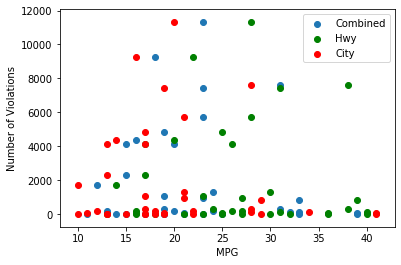

In [442]:
plt.scatter(FREQUENCY.Combo,FREQUENCY.Count,label='Combined')
plt.scatter(FREQUENCY.Hwy,FREQUENCY.Count,label='Hwy', color='green')
plt.scatter(FREQUENCY.City,FREQUENCY.Count,label='City', color='red')
plt.xlabel('MPG')
plt.ylabel('Number of Violations')
plt.legend()
plt.show()

count/sales= countper sale

vio per vic sold vs combined fuel econ

population is traffic ticket violtions 

of the traffic violations as fuel conusmption increases ????? 


normalized for puchase rate there is a a _______ corolation betweent fuel econmy and violation frequency

corolation hypothesis test. tell me that if my r value is less than 

maryland is represntiive



In [370]:
FREQUENCY.corr()

,Count,City,Hwy,Combo,Guzzler
Count,1.000000,-0.100775,0.020164,-0.060900,-0.042002
City,-0.100775,1.000000,0.861236,0.980608,-0.691064
Hwy,0.020164,0.861236,1.000000,0.940058,-0.801926
Combo,-0.060900,0.980608,0.940058,1.000000,-0.754346
Guzzler,-0.042002,-0.691064,-0.801926,-0.754346,1.000000


In [372]:
-.100775*(34/(1-(-.100775)**2))**.5

-0.5906208853312015

find area to the left of this on bell curve and right of +.59
comes out of a t distribuion with 34 deg of freedom

if that summed area is less than .05 there is evidence to reject the null hypo.

null hypo is that there is a zero corolation

In [30]:
import scipy.stats as stats

In [375]:
stats.t(df=34).cdf(-.59)*2

0.5590916998697717

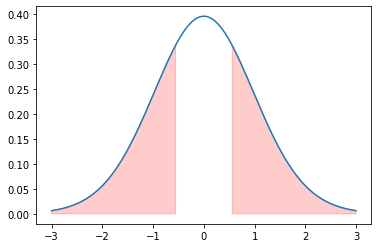

In [41]:
tdistro=stats.t(df=34).pdf(np.linspace(-3,3,200))
x=np.linspace(-3,3,200)
plt.plot(np.linspace(-3,3,200),tdistro)
plt.fill_between(x, tdistro, 0, 
                where=( (-0.55 >= x) | (x >= 0.55) ), color="red", alpha=0.2)
plt.show()

since .55 is more than .05 we do not have enough evidence to reject the null hypo